# 🧠 **Understanding Customer Segmentation & Behavioral Patterns**

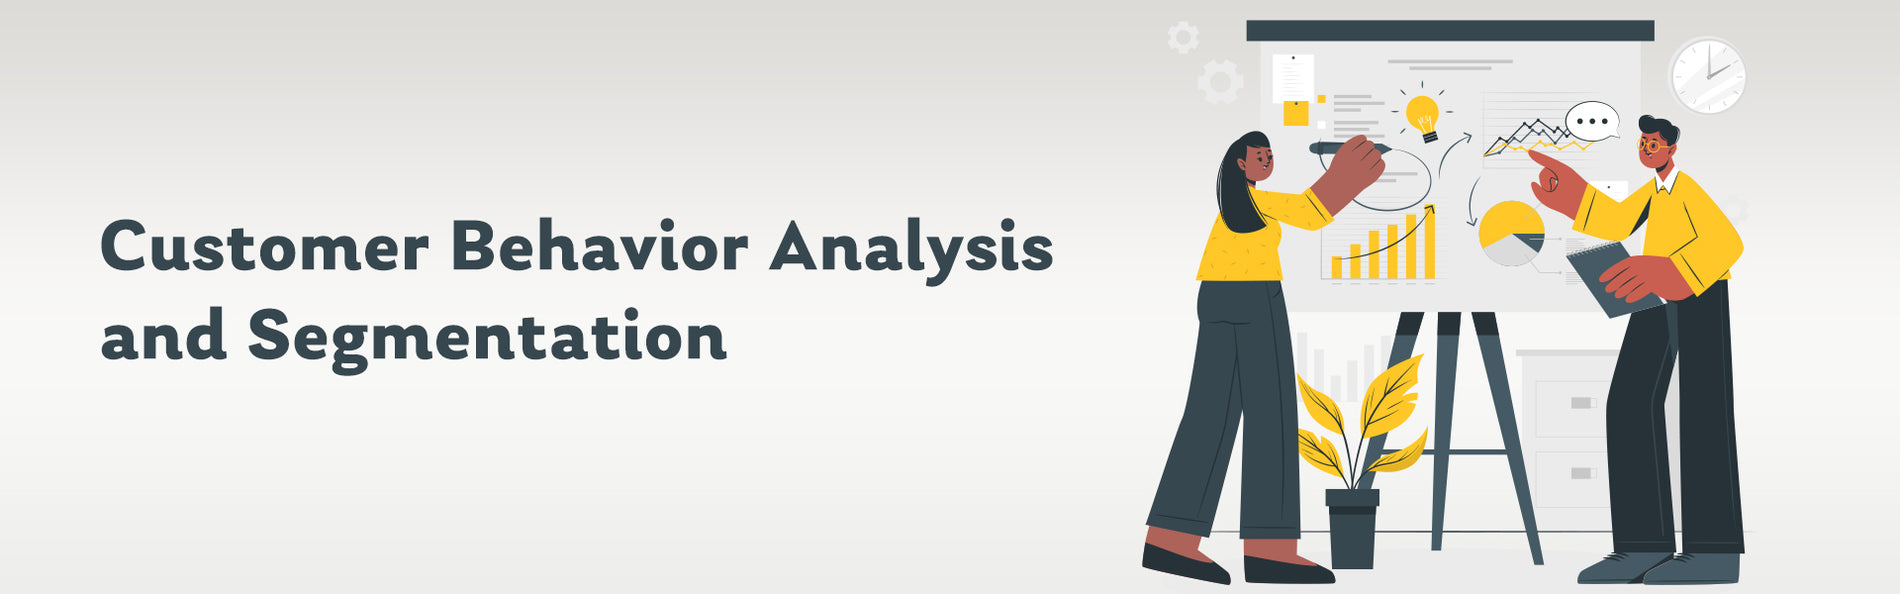

The **Customer Segmentation and Behavior Analysis** project investigates how customers interact, purchase, and engage with products across multiple retail environments.  
By applying **data analytics and segmentation techniques**, this project reveals unique customer groups, identifies key purchasing drivers, and uncovers behavioral trends that evolve over time.

The objective is to empower businesses with **actionable intelligence** — enabling them to design more targeted marketing strategies, refine product placement, and create personalized shopping experiences that enhance overall customer satisfaction and profitability.

---

## 🧾 **Dataset Overview**

This dataset captures transactional and demographic data collected from **10 major shopping malls in Istanbul** between **2021 and 2023**.  
It provides a multi-dimensional view of customer activities, representing a balanced mix of **age groups**, **genders**, and **shopping behaviors**.

### **Key Features:**
- 🧍‍♂️ **Customer Demographics:** Age, Gender, and Customer ID  
- 💳 **Transaction Details:** Payment Method, Quantity, and Price  
- 🛍️ **Product Information:** Category and Shopping Mall Location  
- 📅 **Temporal Insights:** Purchase Date and Seasonal Trends  

These details form a strong analytical foundation to explore how different customer segments behave and what factors influence their purchasing decisions.

---

## 🧹 **Objective of Data Preparation**

Before diving into analysis, the dataset undergoes a structured **data cleaning and preprocessing phase** to ensure accuracy and consistency.  
This includes:
- Removing or handling missing or duplicate records  
- Validating numerical and categorical data types  
- Standardizing column names for readability  
- Creating new derived fields for segmentation and trend analysis  

The cleaned and processed dataset will then serve as the basis for **exploratory analysis, segmentation modeling**, and **behavioral insight generation**.

---

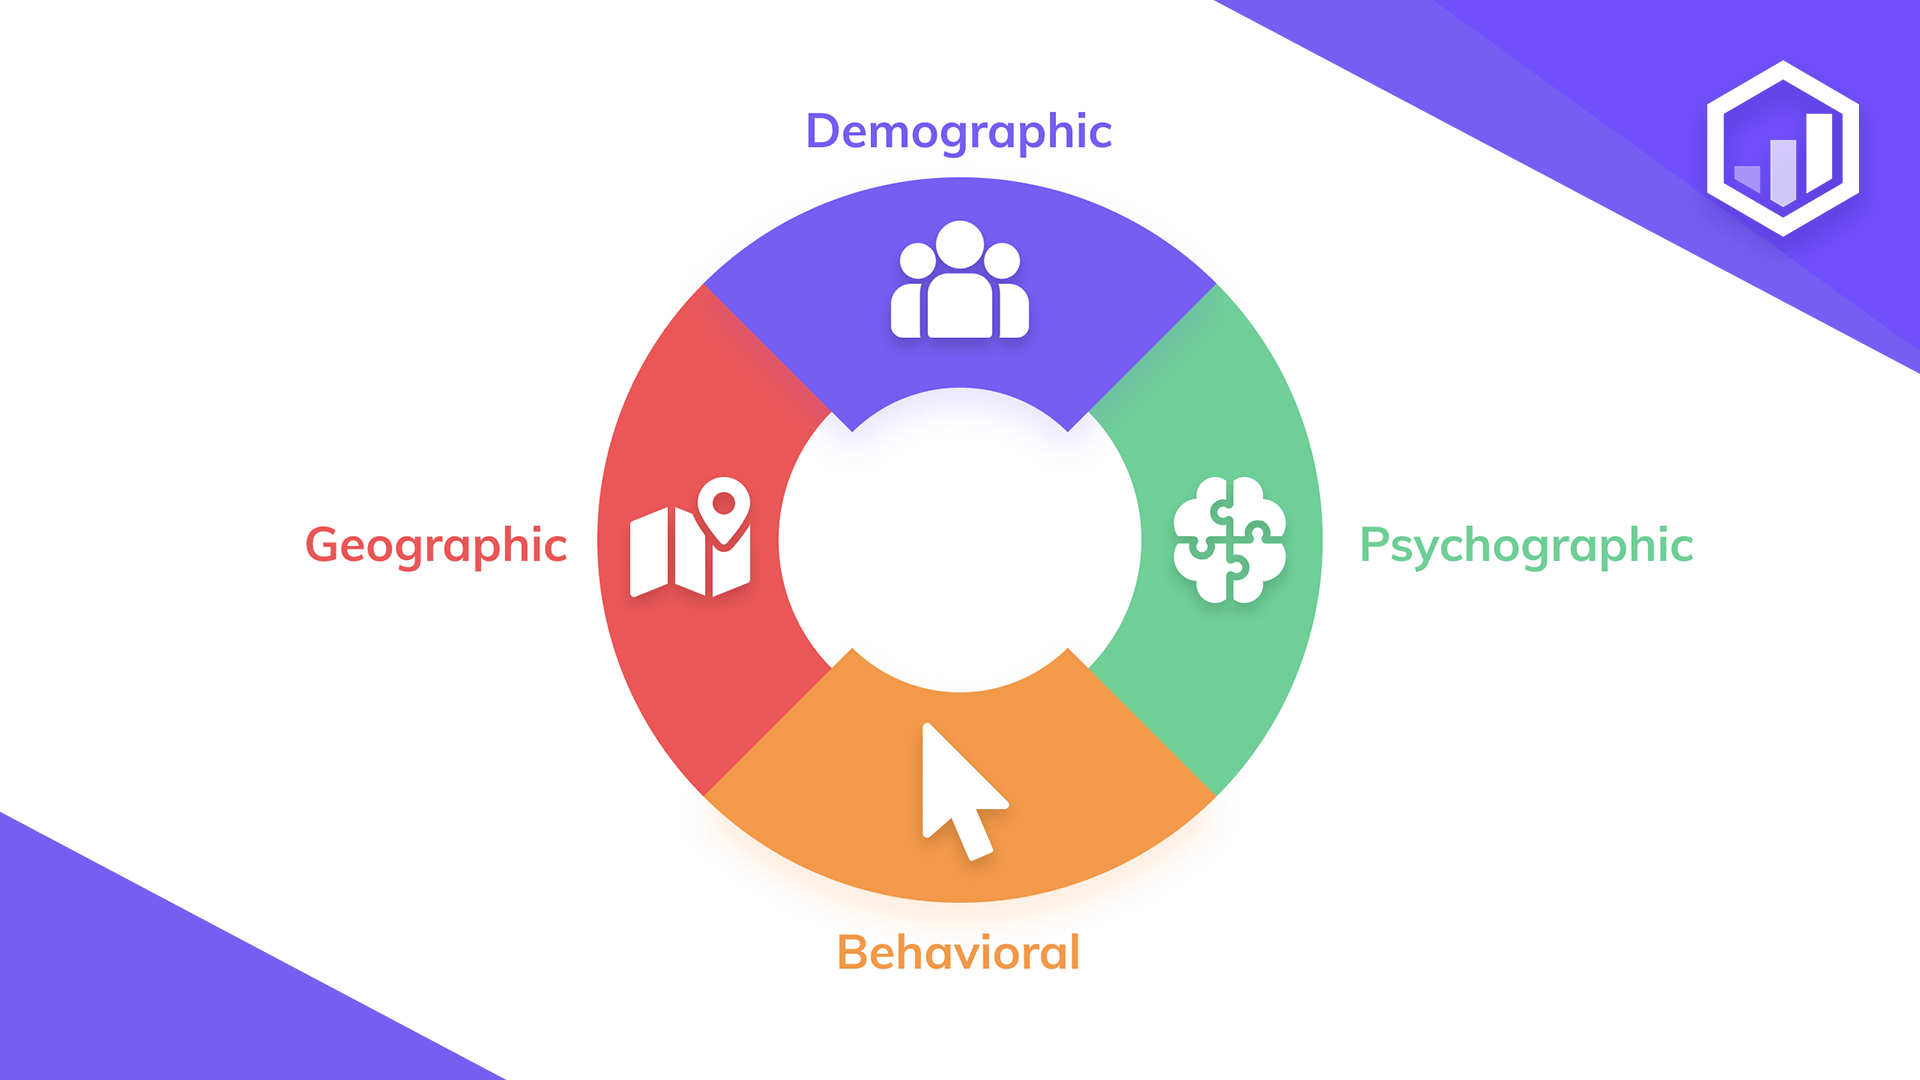

---



# Preparation

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# connecting to the file

df = pd.read_csv("customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# 🧩 **Data Understanding**

This section provides an overview of the dataset’s key attributes and their respective meanings.  
Each feature captures an important aspect of customer transactions, demographics, and shopping behavior.

---

## **📋 Attribute Information**

1. **invoice_no** — Unique identifier for each transaction.  
   Format: Combination of the letter **‘I’** followed by a six-digit numeric code (e.g., *I123456*).

2. **customer_id** — Unique identifier for each customer.  
   Format: Combination of the letter **‘C’** followed by a six-digit numeric code (e.g., *C654321*).

3. **gender** — Categorical variable representing the customer’s gender (*Male* / *Female*).

4. **age** — Numeric variable indicating the customer’s age (positive integer).

5. **category** — Describes the **product category** purchased (e.g., *Clothing*, *Cosmetics*, *Food*, etc.).

6. **quantity** — Numeric variable denoting the **number of items** purchased per transaction.

7. **price** — Unit price of each product, represented in **Turkish Lira (₺)**.

8. **payment_method** — Categorical variable showing the **mode of payment** used (e.g., *Cash*, *Credit Card*, *Debit Card*).

9. **invoice_date** — Date on which the transaction occurred.

10. **shopping_mall** — Name of the shopping mall where the transaction was completed.

---

🧠 *Together, these features form the foundation for analyzing customer purchasing behavior, spending trends, and shopping preferences across various malls and demographics.*


# Data Loading, Cleaning and Initial Data Exploration

In [4]:
#Size and info of data

print(f"The size of the data is {df.shape}")
print(f"The data have  {df.shape[0]} rows and {df.shape[1]} columns.")
print()
print(f"The overall information of the data:")
print()
print(df.info())

The size of the data is (99457, 10)
The data have  99457 rows and 10 columns.

The overall information of the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [5]:
# Checking if there is missing values

sum(df.isnull().sum())

0

<font size = '4'>We have no missing values as we can see this in above overall information.</font>

In [6]:
# Checking removing duplicates

print(f"We have {df.duplicated().sum()} duplicate values.")

We have 0 duplicate values.


<font color='black' size='4'>We do not have any duplicate row.</font>

In [7]:
# Checking Unique Values

df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [8]:
#Describing data, Summary statistics

print("Summary Statistics for Numerical Columns:")
print(df.describe())

Summary Statistics for Numerical Columns:
                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


# Data Analysis:

# 1. Demographic Analysis:

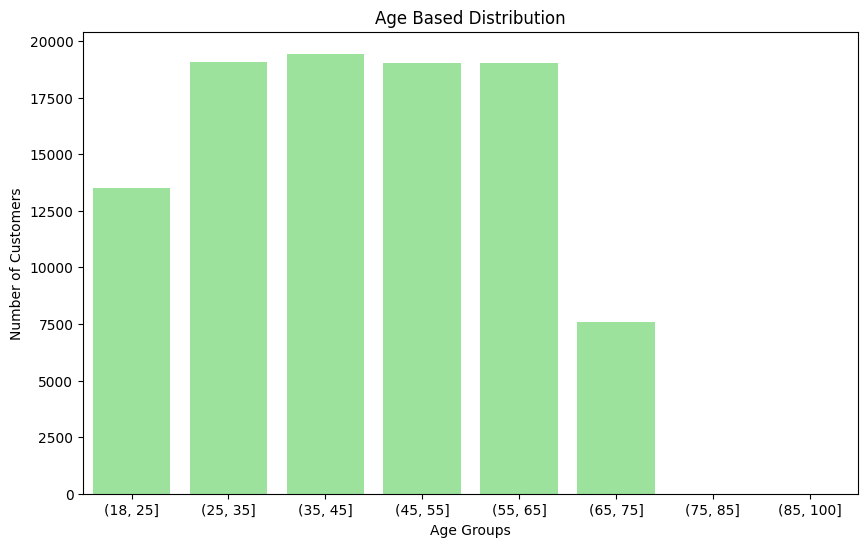


Average age of customers: 43
Aveage age group: (35, 45]


In [9]:
# Distribution of customer based on Age

age_bins = [18,25,35,45,55,65,75,85,100]    #Creating age bins
df['age_group'] = pd.cut(df['age'], bins = age_bins)

age_distribution = df['age_group'].value_counts()

plt.figure(figsize = (10,6))

sns.barplot(x=age_distribution.index, y = age_distribution.values, color = 'lightgreen')
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.title('Age Based Distribution')
plt.xticks(rotation= 0)
plt.show()
print()
print(f"Average age of customers: {df['age'].mean():.0f}")
print(f"Aveage age group: {df['age_group'].mode()[0]}")

<font color='black' size='4'>The customers of age group (35,45) shops more compared to other age group.
    
  <font color='black' size='4'> The customers of Age between 25 to 65 shops more. The customers of age 65 to 75 shop least.</font>

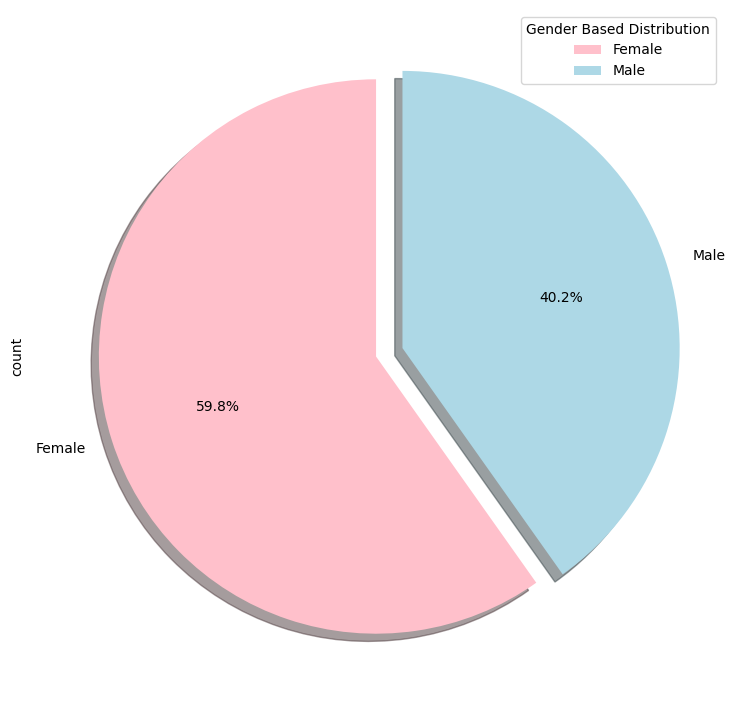

In [10]:
# Distribution of customer based on Gender

df_gbd = df['gender'].value_counts()
plt.figure(figsize=(9, 9))
df_gbd.plot(kind='pie', autopct='%1.1f%%', startangle= 90, explode = [0, 0.1], shadow = True, colors = ['pink', 'lightblue'])
plt.legend(title='Gender Based Distribution')

plt.show()

<font color='black' size='4'>As we can see on the above pie chart the female have more than half of the shopping distribution.</font>

<font color='black' size='4'>Nearly 60%, this telling us that how much females love shopping.</font>

C:\Users\Asus\AppData\Local\Temp\ipykernel_9068\3137482754.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ageXcategory = df.groupby(['category', 'age_group']).size().reset_index(name='count')


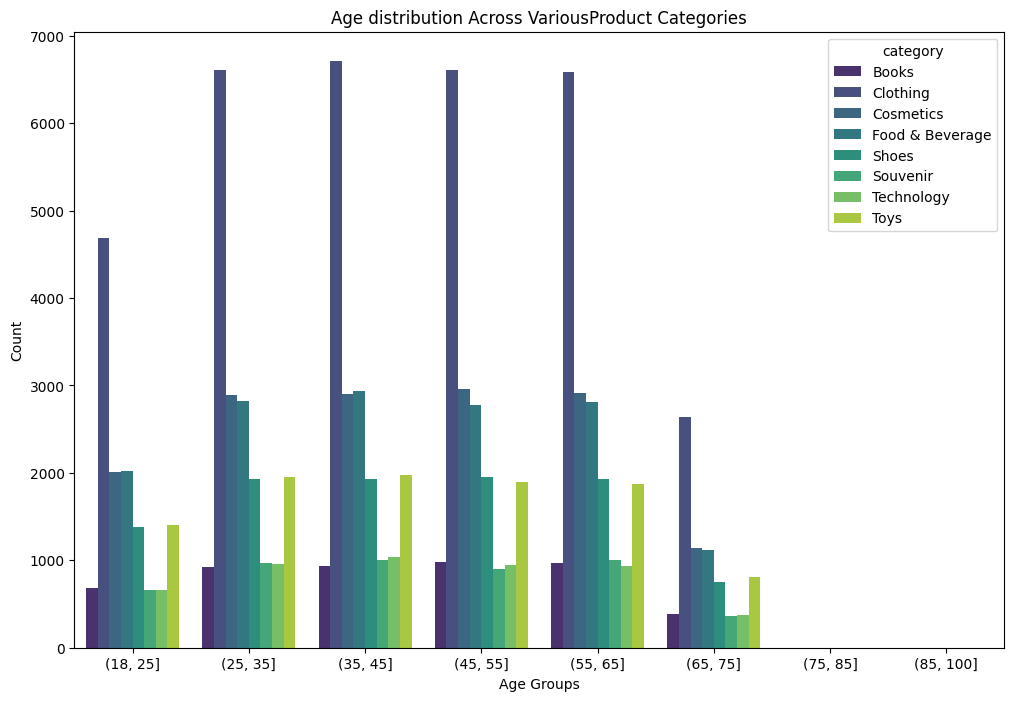

In [11]:
# Age distribution across different product categories

df_ageXcategory = df.groupby(['category', 'age_group']).size().reset_index(name='count')
df_ageXcategory

plt.figure(figsize = (12,8))
sns.barplot(x='age_group',y='count',hue='category',data=df_ageXcategory, palette = 'viridis')
plt.title('Age distribution Across VariousProduct Categories')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

<font color='black' size='4'>Clothing products are the most selling product across all age groups.</font>

The product category cosmetic is popular among the customers of age between 25 to 65.

Top 1: Clothing

Top 2: Cosmetic

Top 3: Food and Beverage

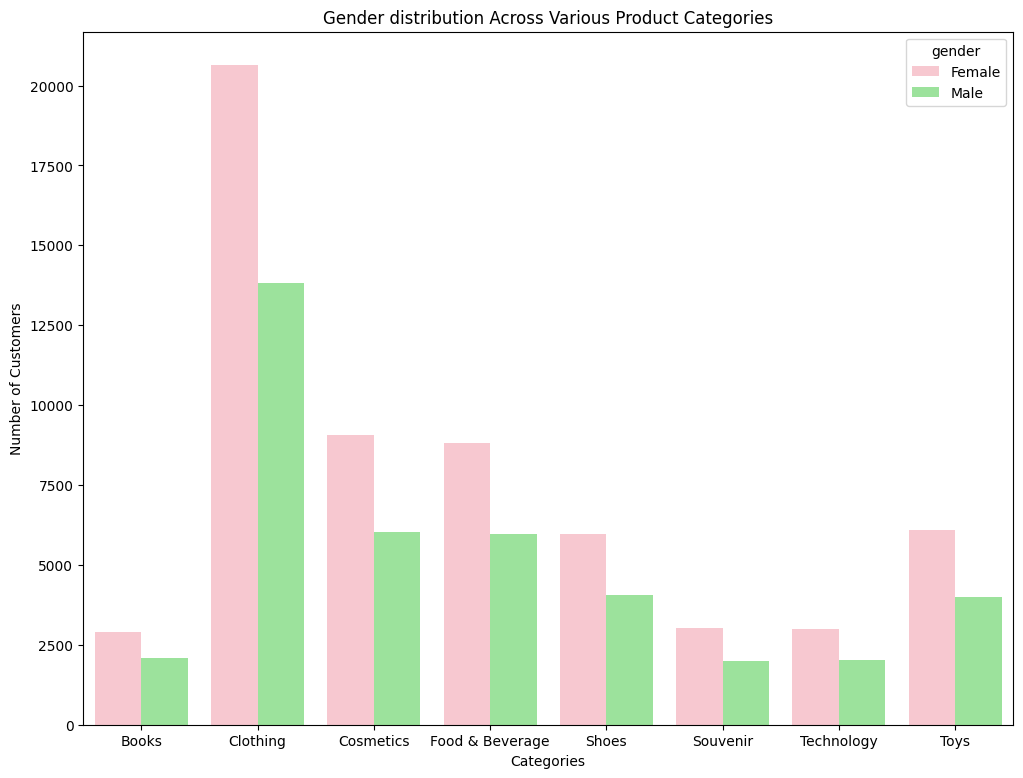

In [12]:
# Gender distribution across different product categories

df_genderXcategory = df.groupby(['gender', 'category']).size().reset_index(name = 'count')
df_genderXcategory
plt.figure(figsize=(12,9))

sns.barplot(x='category', y='count', hue= 'gender', data=df_genderXcategory, palette = ['pink', 'lightgreen'])
plt.title('Gender distribution Across Various Product Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Customers')
plt.show()

<font color='black' size='4'>Females are more interested in clothings, cosmetics and food.</font>

C:\Users\Asus\AppData\Local\Temp\ipykernel_9068\2204066452.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_genderXage = df.groupby(['gender', 'age_group']).size().reset_index(name='count')


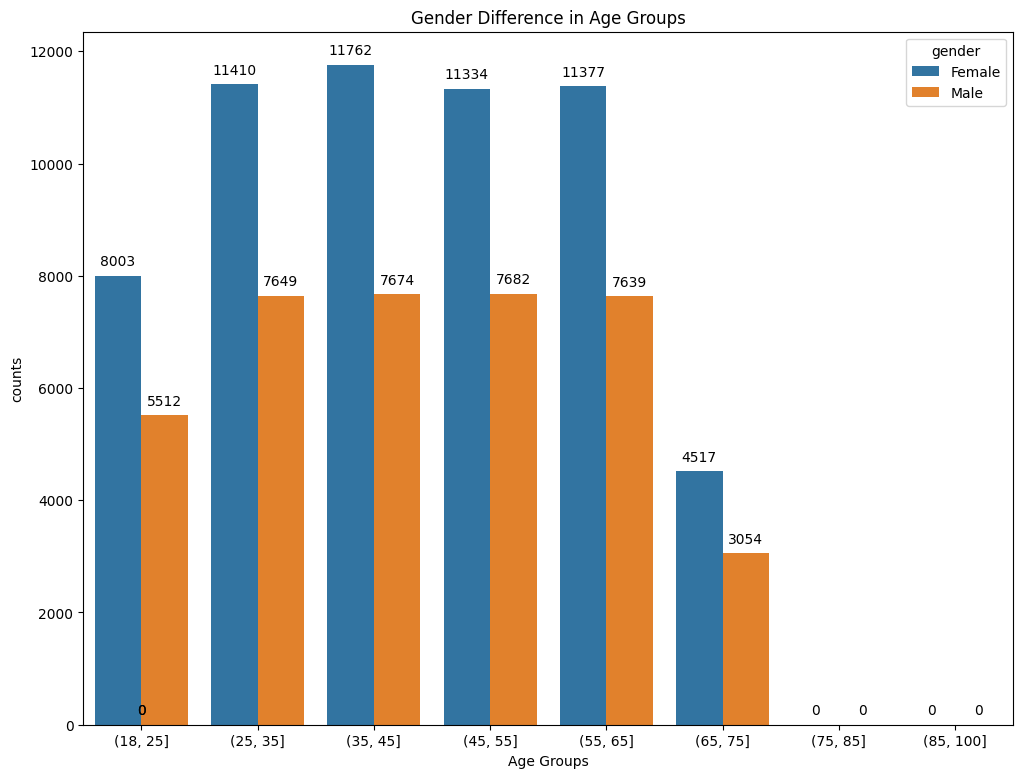

In [13]:
# Gender distribution across different age groups

df_genderXage = df.groupby(['gender', 'age_group']).size().reset_index(name='count')
df_genderXage
plt.figure(figsize=(12,9))
ax = sns.barplot(x = 'age_group', y = 'count', hue='gender', data = df_genderXage)

for p in ax.patches:
  total_count = p.get_height()
  ax.annotate(f'{total_count:.0f}', (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),textcoords = 'offset points')

plt.title('Gender Difference in Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('counts')
plt.show()

<font color='black' size='4'>In females the age group 35 to 45 shop highest</font>

<font color='black' size='4'>The females of age between 65 to 75 shop lowest</font>

<font color='black' size='4'>The males age between 25 to 65 shop the highest</font>

<font color='black' size='4'>The males of age between 65 to 75 shop lowest</font>

# 2. Purchase History:

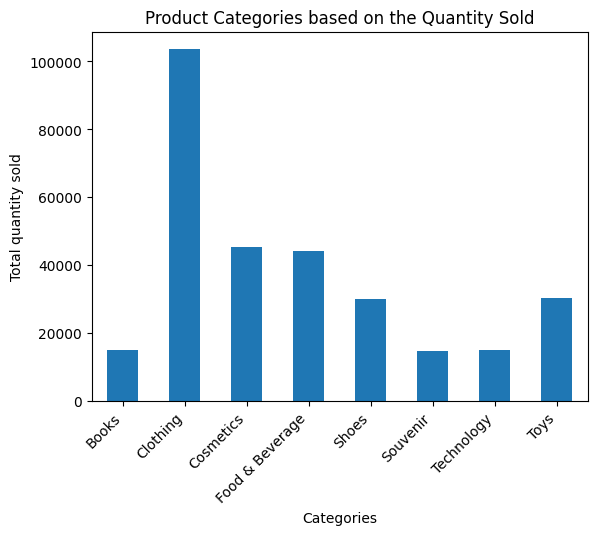

In [14]:
# Product categories based on the quantity sold

df_categoryXquantity = df.groupby('category')['quantity'].sum()
df_categoryXquantity
df_categoryXquantity.sort_index().plot(kind = 'bar')
plt.title('Product Categories based on the Quantity Sold')
plt.xlabel('Categories')
plt.ylabel('Total quantity sold')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

<font color='black' size='4'>The product category clothing have most quantity sold, it can also be verify by the above analysis. Whereas books are the least sold category.</font>

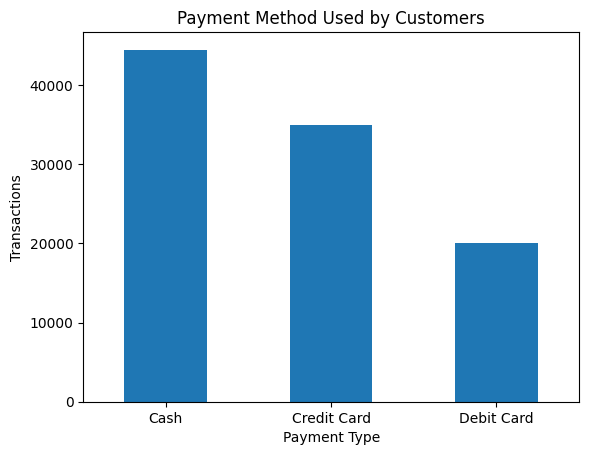

Total payment made by Cash: 44447
Total payment made by Credit Card: 34931
Total payment made by Debit Card: 20079


In [15]:
# Total transaction made by payment method

df_priceXpayment_method = df.groupby('payment_method')['price'].count()
df_priceXpayment_method.sort_index().plot(kind = 'bar')
plt.title('Payment Method Used by Customers')
plt.xlabel('Payment Type')
plt.ylabel('Transactions')
plt.xticks(rotation = 0)
plt.show()
for i, j in df_priceXpayment_method.items():
  print(f"Total payment made by {i}: {j}")

<font color='black' size='4'>Most peoples prefer payments made by Cash.</font>

# 3. Customer Behavior:

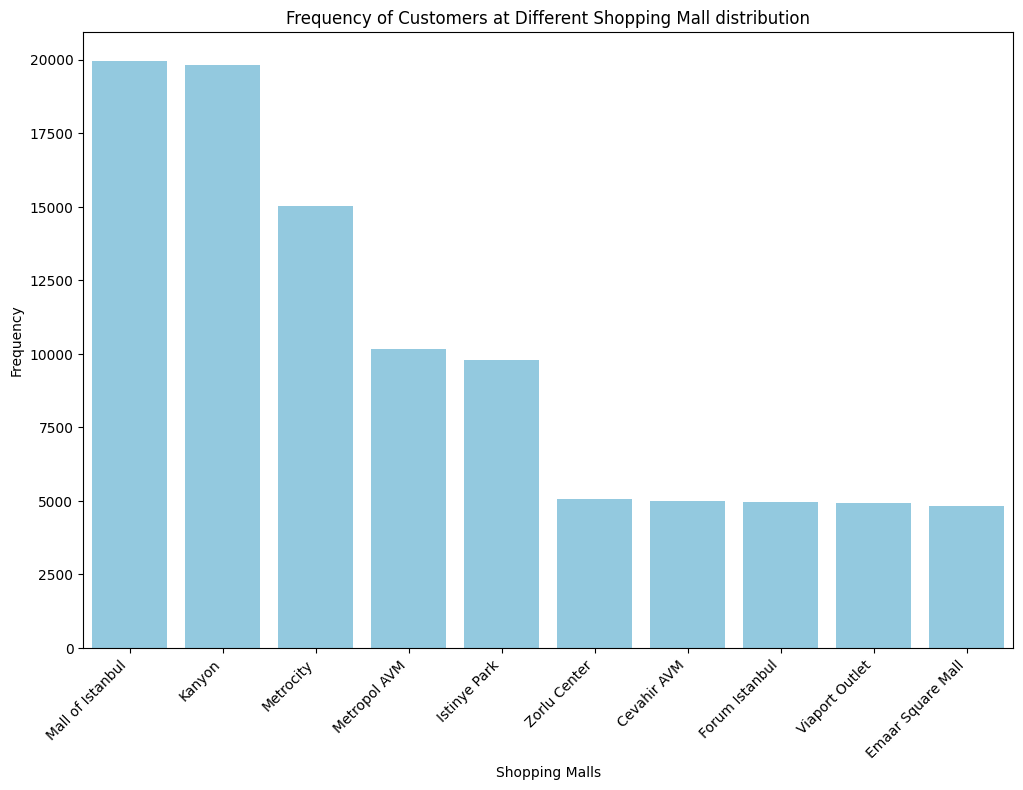

In [16]:
# Shopping Mall distribution. How frequently do customers shop at different shopping malls?

df_shopping_mall = df['shopping_mall'].value_counts()
df_shopping_mall
plt.figure(figsize = (12,8))

sns.barplot(x=df_shopping_mall.index, y=df_shopping_mall.values, color = 'skyblue')

plt.xlabel('Shopping Malls')
plt.ylabel('Frequency')
plt.title('Frequency of Customers at Different Shopping Mall distribution')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

<font color='black' size='4'>In Istanbul there are top 3 shopping malls from the people shop most are: Mall of Istanbul, Kanyon, and Metrocity.</font>

C:\Users\Asus\AppData\Local\Temp\ipykernel_9068\791731629.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ageXpayment = df.groupby(['age_group', 'payment_method']).size().reset_index(name = 'count')


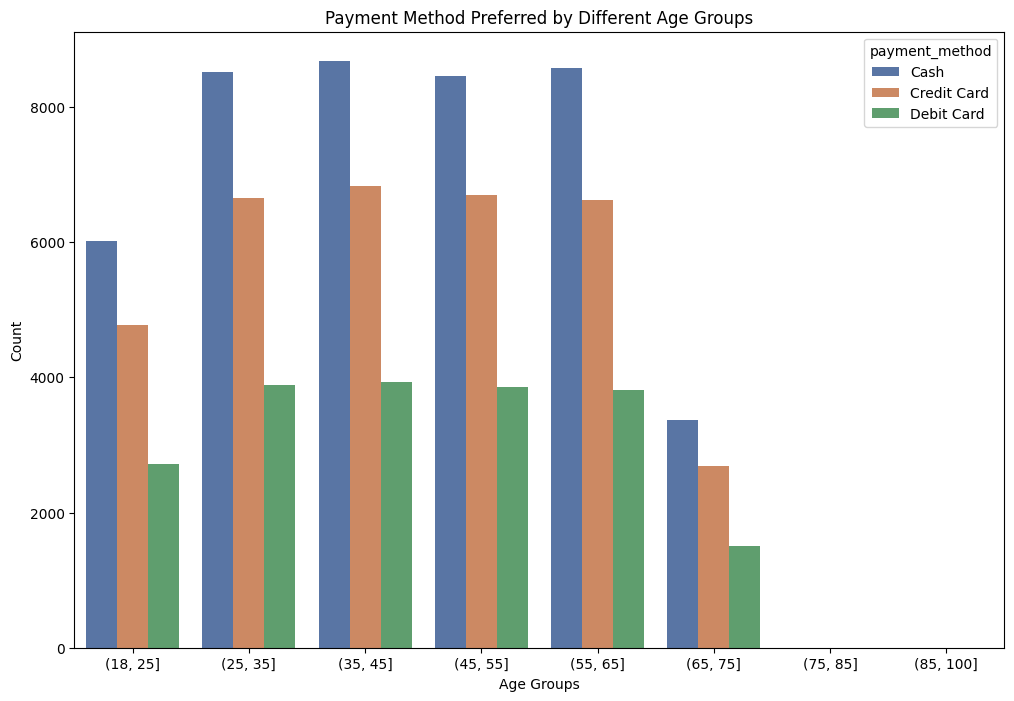

In [17]:
# Are there specific payment methods preferred by different age groups?
df_ageXpayment = df.groupby(['age_group', 'payment_method']).size().reset_index(name = 'count')
df_ageXpayment

plt.figure(figsize = (12,8))
sns.barplot(x= 'age_group', y = 'count', hue = 'payment_method', data = df_ageXpayment,  palette = 'deep')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Payment Method Preferred by Different Age Groups')
plt.show()

<font color='black' size='4'>Cash is most preffered payment method of customers of age group between 25 to 65.
    
<font color='black' size='4'>The same age group of 25 to 65 also use credit card more than any other age groups.</font>

# 4. Seasonal Trends:

In [18]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,"(25, 35]"
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,"(18, 25]"
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,"(18, 25]"
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,"(65, 75]"
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,"(45, 55]"


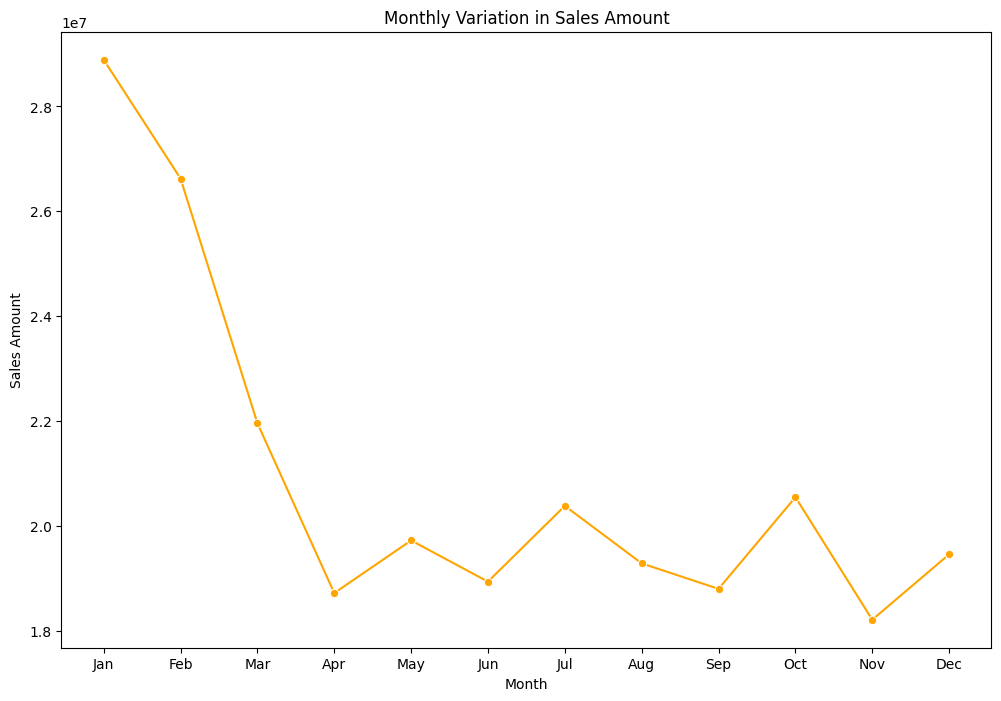

In [19]:
#Analyzing the monthly variation in sales volume.(of all year)

df['sales_amount'] = df['quantity'] * df['price']

df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = '%d/%m/%Y') #convert invoice date to date time format

df['month'] = df['invoice_date'].dt.month

monthly_sales_amount = df.groupby('month')['sales_amount'].sum()

plt.figure(figsize= (12,8))
sns.lineplot(x=monthly_sales_amount.index, y=monthly_sales_amount.values, marker = 'o', color = 'orange')
plt.title('Monthly Variation in Sales Amount')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<font color='black' size='4'>The highest sales in the month of January and we can see the fall of sales in the month of April.</font>

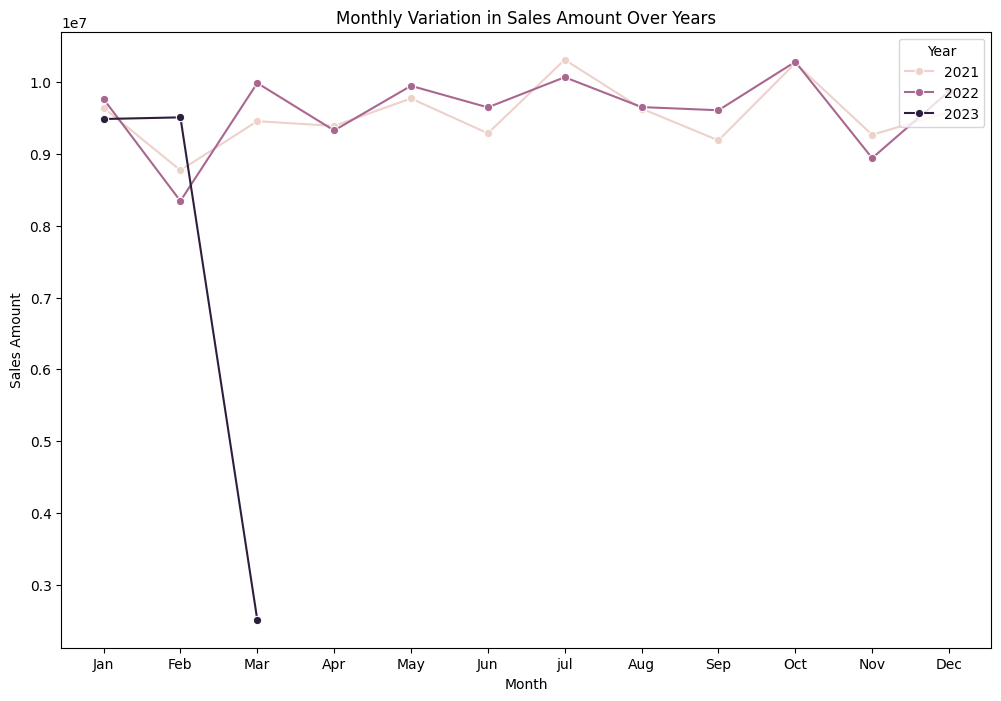

In [20]:
#Analyzing the monthly variation in sales volume.(of each year)
df['year'] = df['invoice_date'].dt.year
monthly_sales_amount = df.groupby(['year','month'], as_index = False).agg({'sales_amount':'sum'})

plt.figure(figsize=(12,8))
sns.lineplot(x = 'month', y = 'sales_amount', hue = 'year', data = monthly_sales_amount, marker='o')
plt.title('Monthly Variation in Sales Amount Over Years')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.legend(title = 'Year', loc='upper right')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<font color='black' size='4'>The highest sales in each year is in the month of January.
    
<font color='black' size='4'>The sales in the year 2022 remains positive following zigzag moment.</font>

<font color='black' size='4'>The sales in march 2023 dropped.</font>

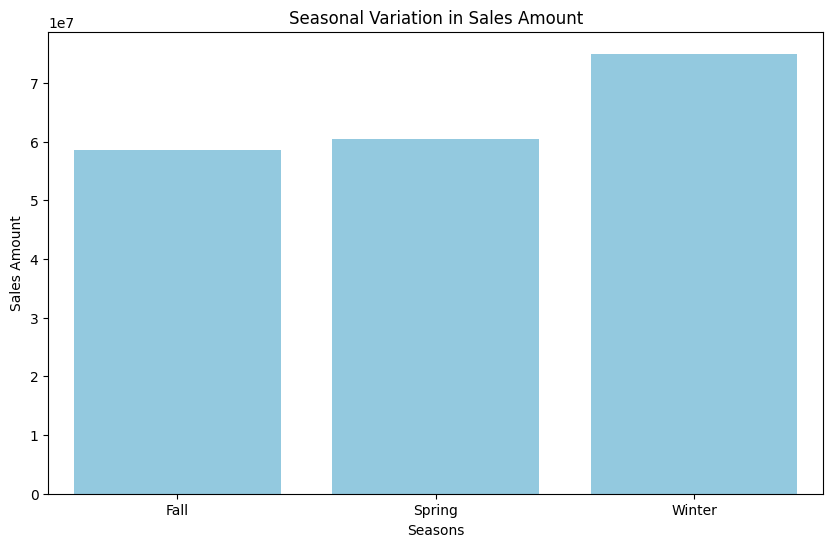

In [21]:
#Identify any significant seasonal trends or patterns in customer shopping behavior.

def map_to_season(month):
  if month in [12, 1 , 2]:
    return 'Winter'
  elif month in [3,4,5]:
    return 'Spring'
  elif month in [6,7,8]:
    return 'Fall'

df['seasons'] = df['month'].apply(map_to_season)

seasonal_sales = df.groupby('seasons')['sales_amount'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, color= 'skyblue')
plt.title('Seasonal Variation in Sales Amount')
plt.xlabel('Seasons')
plt.ylabel('Sales Amount')
plt.show()

<font color='black' size='4'>People tends to shop more in Winter than Fall and Spring season</font>

# 5. Top Product Categories by Revenue

C:\Users\Asus\AppData\Local\Temp\ipykernel_9068\2786526011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


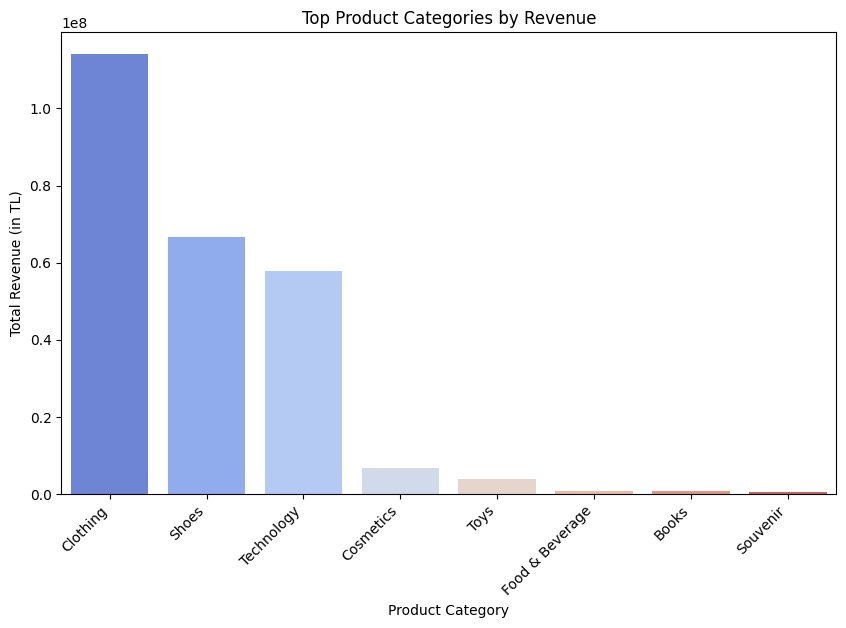

In [26]:
# Calculate total revenue for each category
df_category_revenue = (
    df.groupby("category")["sales_amount"].sum().sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=df_category_revenue.index, y=df_category_revenue.values, palette="coolwarm"
)
plt.title("Top Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue (in TL)")
plt.xticks(rotation=45, ha="right")
plt.show()

# 6. Payment Method Contribution to Total Revenue

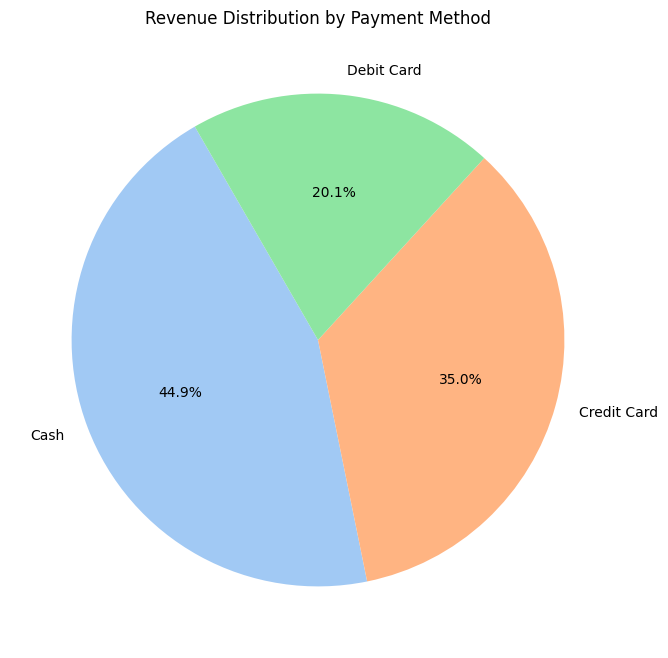

In [27]:
df_payment_revenue = (
    df.groupby("payment_method")["sales_amount"].sum().sort_values(ascending=False)
)

plt.figure(figsize=(8, 8))
plt.pie(
    df_payment_revenue.values,
    labels=df_payment_revenue.index,
    autopct="%1.1f%%",
    startangle=120,
    colors=sns.color_palette("pastel"),
)
plt.title("Revenue Distribution by Payment Method")
plt.show()

# 6. Top 10 Customers by Total Spend

C:\Users\Asus\AppData\Local\Temp\ipykernel_9068\3696795130.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_customer_spend.index, y=df_customer_spend.values, palette="mako")


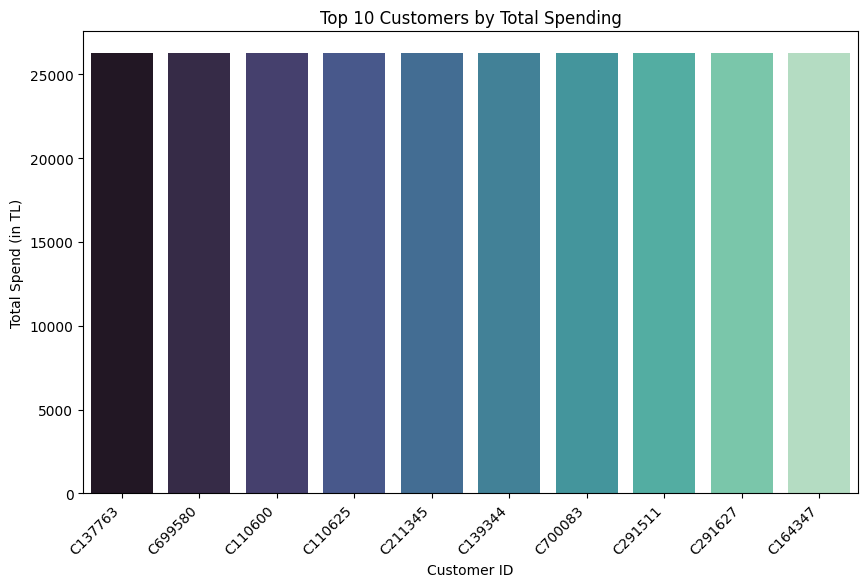

In [28]:
df_customer_spend = (
    df.groupby("customer_id")["sales_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=df_customer_spend.index, y=df_customer_spend.values, palette="mako")
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend (in TL)")
plt.xticks(rotation=45, ha="right")
plt.show()

# 7. Revenue Distribution by Payment Method

C:\Users\Asus\AppData\Local\Temp\ipykernel_9068\2971588792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="payment_method", y="sales_amount", data=df, palette="Set2")


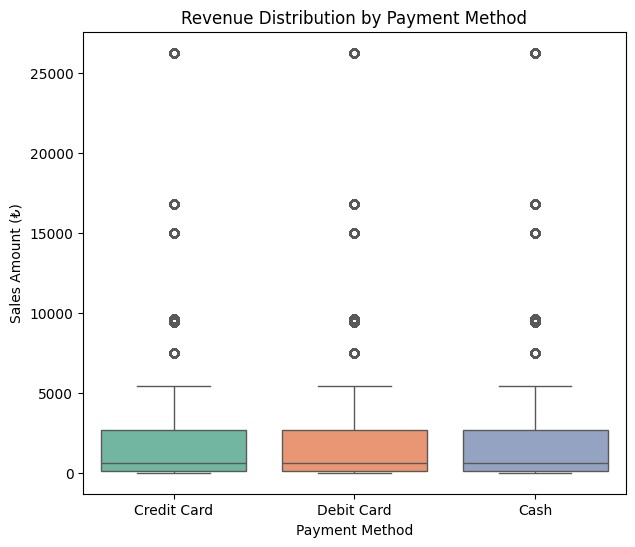

In [29]:
plt.figure(figsize=(7, 6))
sns.boxplot(x="payment_method", y="sales_amount", data=df, palette="Set2")
plt.title("Revenue Distribution by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Sales Amount (₺)")
plt.show()

# 7. Revenue Distribution by Payment Method

C:\Users\Asus\AppData\Local\Temp\ipykernel_9068\2971588792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="payment_method", y="sales_amount", data=df, palette="Set2")


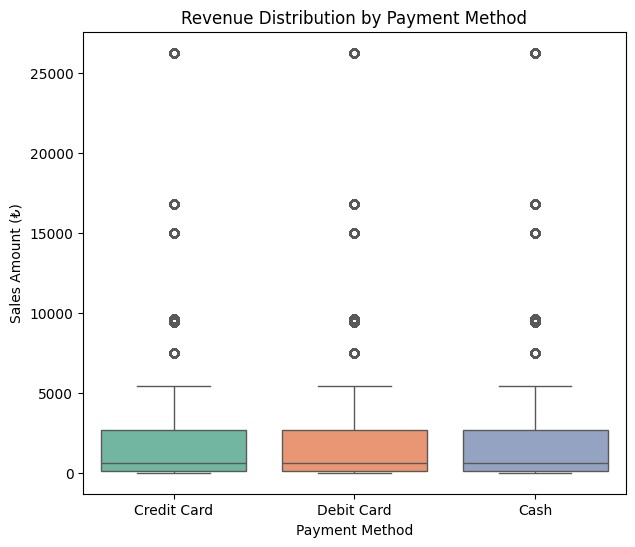

In [30]:
plt.figure(figsize=(7, 6))
sns.boxplot(x="payment_method", y="sales_amount", data=df, palette="Set2")
plt.title("Revenue Distribution by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Sales Amount (₺)")
plt.show()

# 8. Sales Trend by Weekday

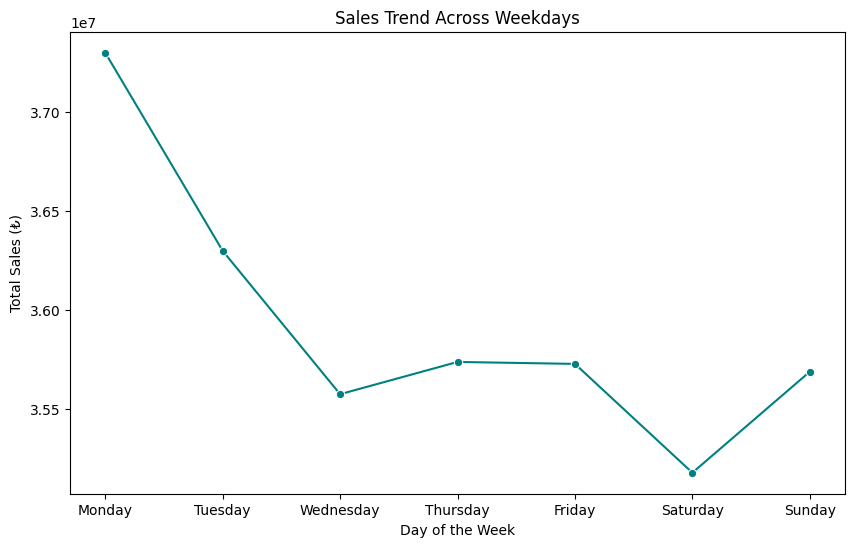

In [31]:
df["weekday"] = df["invoice_date"].dt.day_name()
weekday_sales = (
    df.groupby("weekday")["sales_amount"]
    .sum()
    .reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    )
)

plt.figure(figsize=(10, 6))
sns.lineplot(x=weekday_sales.index, y=weekday_sales.values, marker="o", color="teal")
plt.title("Sales Trend Across Weekdays")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales (₺)")
plt.show()

# 9. Revenue Distribution Across Seasons and Genders

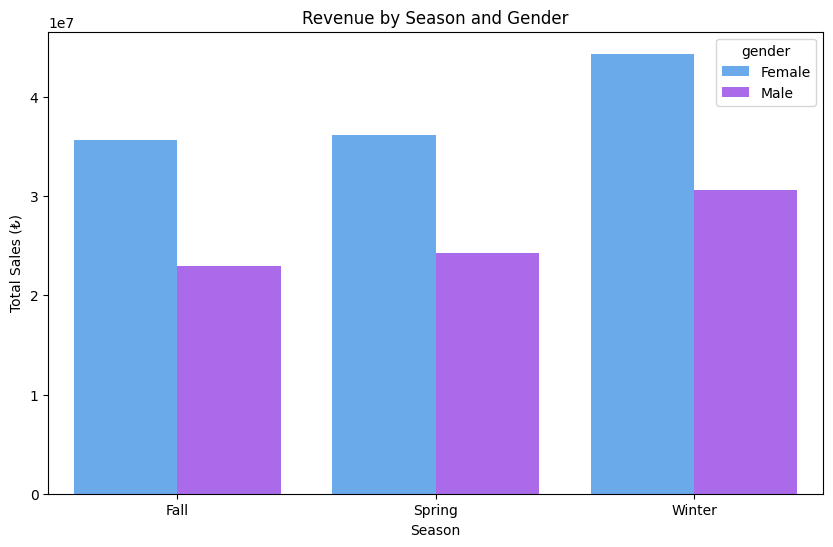

In [32]:
season_gender_sales = (
    df.groupby(["seasons", "gender"])["sales_amount"].sum().reset_index()
)
plt.figure(figsize=(10, 6))
sns.barplot(
    x="seasons",
    y="sales_amount",
    hue="gender",
    data=season_gender_sales,
    palette="cool",
)
plt.title("Revenue by Season and Gender")
plt.xlabel("Season")
plt.ylabel("Total Sales (₺)")
plt.show()

## ✅ Bonus: Cumulative Revenue Growth Over Time

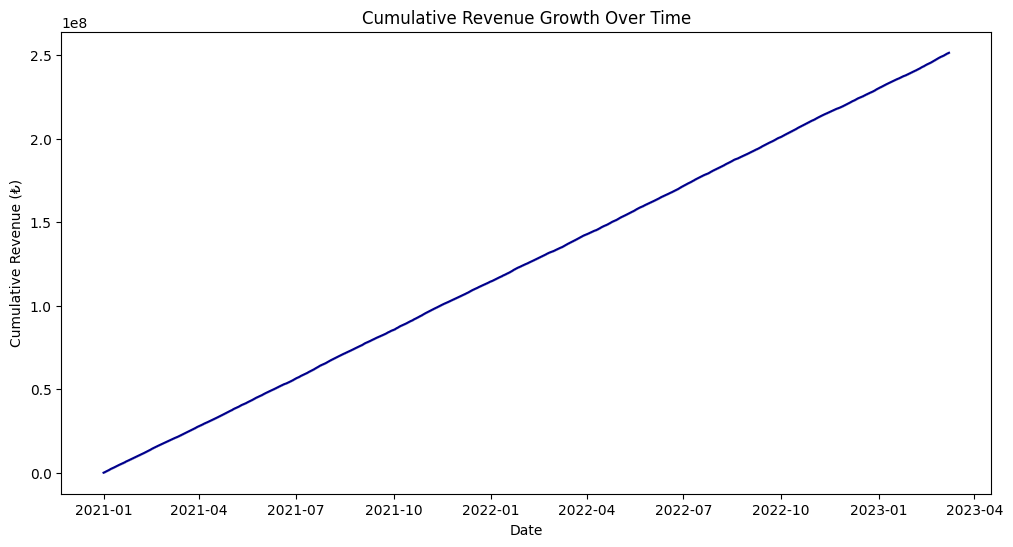

In [34]:
df = df.sort_values("invoice_date")
df["cumulative_revenue"] = df["sales_amount"].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df["invoice_date"], y=df["cumulative_revenue"], color="darkblue")
plt.title("Cumulative Revenue Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Revenue (₺)")
plt.show()

# Conclusion

* **The customers of age between 25 to 65 shops more than the customers of any other age groups**

* **The females shop more than males. More than half of the total are females the pie chart with 59.8% of the population being female and 40.2% being male**

* **The most sought-after product categories among all age groups are clothing, cosmetics, food and beverage. This suggests that these are the most popular categories for shoppers at the mall, regardless of their age.**

* **The females have a higher number of customers in all categories except books, souvenir and toys. This suggests that females are more likely to purchase products in most categories, while males are more likely to purchase technology products and toys.**

* **There are more female customers than male customers in all age groups except for the 18-25 age group. This suggests that the malls are more popular among women than men.**

* **Clothing is the most popular product category, with a quantity more than 1 lakh.**

* **Cash is the most used payment method among all costumers of different age groups.**

* **In January month of each year (2021, 2022 and 2023) have the most sales volume.**

* **Sales tend to be higher during the Winter season (December, January and Feburary).**



# Ending Note

As we wrap up the Customer Segmentation and Behavior Analysis Project, we've looked how customers interact and make purchases. By uncovering unique segments and understanding what products they lean towards, we've gained valuable insights for businesses. This marks the beginning of smarter marketing, improved customer experiences, and well-informed decisions.